In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing as SimpleExpSmoothing

data = pd.read_csv(r"travel insurance.csv")
data.head()

,Agency Type,Distribution Channel,Claim,Duration,Net Sales,Commision (in value),Age
0,Travel Agency,Offline,No,186,-29.0,9.57,81
1,Travel Agency,Offline,No,186,-29.0,9.57,71
2,Travel Agency,Online,No,65,-49.5,29.70,32
3,Travel Agency,Online,No,60,-39.6,23.76,32
4,Travel Agency,Online,No,79,-19.8,11.88,41


In [2]:
data["Distribution Channel"] = np.where(data["Distribution Channel"] == "Offline", 0.,1.)
data["Agency Type"] = np.where(data["Agency Type"] == "Travel Agency", 0.,1.)
data["Claim"] = np.where(data["Claim"] == "No", 0.,1.)
data["Age"] = data["Age"].astype(float)
data.head()

,Agency Type,Distribution Channel,Claim,Duration,Net Sales,Commision (in value),Age
0,0.0,0.0,0.0,186,-29.0,9.57,81.0
1,0.0,0.0,0.0,186,-29.0,9.57,71.0
2,0.0,1.0,0.0,65,-49.5,29.70,32.0
3,0.0,1.0,0.0,60,-39.6,23.76,32.0
4,0.0,1.0,0.0,79,-19.8,11.88,41.0


In [3]:
n_age = int(data.Age.shape[0]*0.1)
n_duration = int(data.Duration.shape[0]*0.15)
n_net_sales = int(data["Net Sales"].shape[0]*0.20)

index_nan_age = np.random.choice(data.Age.size, n_age, replace = False)
index_nan_duration = np.random.choice(data.Duration.size, n_duration, replace = False)
index_nan_net_sales = np.random.choice(data["Net Sales"].size, n_net_sales, replace = False)

for i in index_nan_age:
    data.Age[i] = np.NaN

for i in index_nan_duration:
    data.Duration[i] = np.NaN

for i in index_nan_net_sales:
    data["Net Sales"][i] = np.NaN

/tmp/ipykernel_10744/1198832497.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Age[i] = np.NaN
/tmp/ipykernel_10744/1198832497.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Duration[i] = np.NaN
/home/cauheu/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
data.head()
percent_missing = data.isnull().sum()*100/len(data)
missing_value_data = pd.DataFrame({'percent missing': percent_missing})
print(missing_value_data)

                      percent missing
Agency Type                  0.000000
Distribution Channel         0.000000
Claim                        0.000000
Duration                    14.998579
Net Sales                   19.999684
Commision (in value)         0.000000
Age                          9.999053


In [5]:
df_imput = data.copy()
imputer = SimpleImputer(missing_values = np.NaN, strategy = "mean")

df_imput.Duration = imputer.fit_transform(df_imput['Duration'].values.reshape(-1,1))[:,0]

imputer = SimpleImputer(missing_values = np.NaN, strategy = "most_frequent")
df_imput.Age = imputer.fit_transform(df_imput['Age'].values.reshape(-1,1))[:,0]

imputer = KNNImputer(n_neighbors = 2)
df_imput["Net Sales"] = imputer.fit_transform(df_imput['Net Sales'].values.reshape(-1,1))[:,0]

df_imput.head()

,Agency Type,Distribution Channel,Claim,Duration,Net Sales,Commision (in value),Age
0,0.0,0.0,0.0,186.000000,40.680476,9.57,81.0
1,0.0,0.0,0.0,186.000000,-29.000000,9.57,71.0
2,0.0,1.0,0.0,49.199673,-49.500000,29.70,32.0
3,0.0,1.0,0.0,49.199673,-39.600000,23.76,32.0
4,0.0,1.0,0.0,79.000000,40.680476,11.88,41.0


In [6]:
percent_missing = data.isnull().sum()*100/len(data)
missing_value_data = pd.DataFrame({'percent missing': percent_missing})
print(missing_value_data)

                      percent missing
Agency Type                  0.000000
Distribution Channel         0.000000
Claim                        0.000000
Duration                    14.998579
Net Sales                   19.999684
Commision (in value)         0.000000
Age                          9.999053


In [7]:
mean_orig = data.sum()/len(data)
mean_new = df_imput.sum()/len(df_imput)

mean_frame = pd.DataFrame({'mean 1': mean_orig, 'mean 2': mean_new})
print(mean_frame)

                         mean 1     mean 2
Agency Type            0.275669   0.275669
Distribution Channel   0.982519   0.982519
Claim                  0.014639   0.014639
Duration              41.820421  49.199673
Net Sales             32.544509  40.680476
Commision (in value)   9.809992   9.809992
Age                   35.986751  39.586410


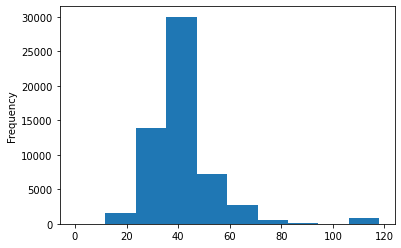

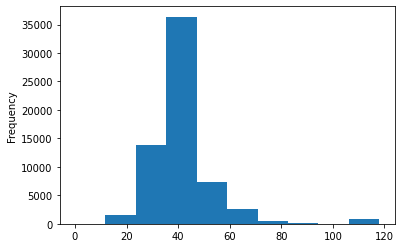

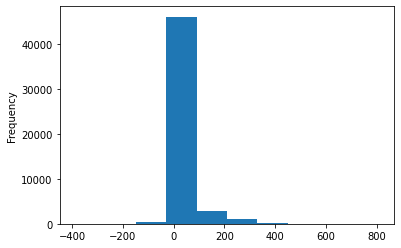

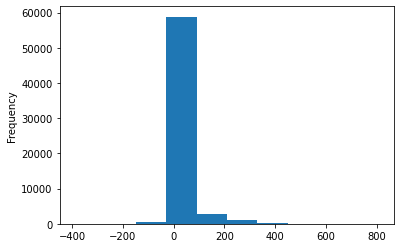

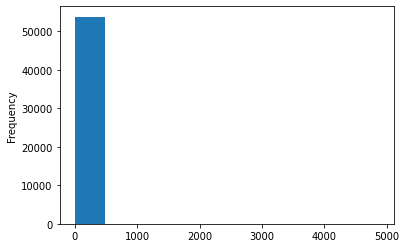

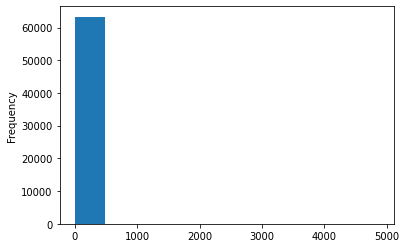

In [14]:

data.Age.plot(kind="hist")
plt.show()
df_imput.Age.plot(kind="hist")
plt.show()
data["Net Sales"].plot(kind="hist")
plt.show()
df_imput["Net Sales"].plot(kind="hist")
plt.show()
data.Duration.plot(kind="hist")
plt.show()
df_imput.Duration.plot(kind="hist")
plt.show()

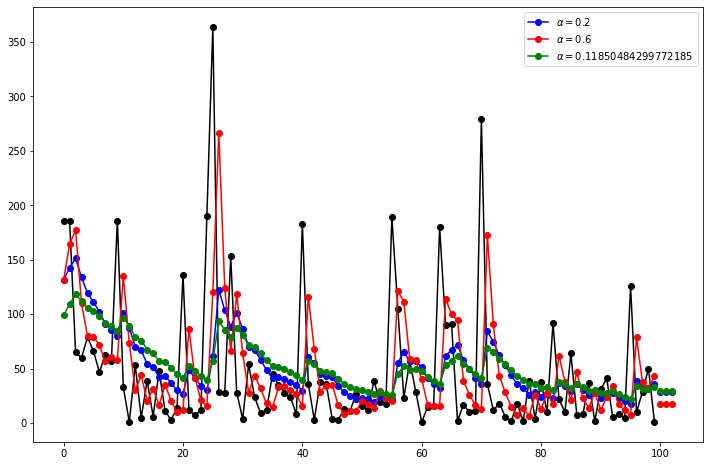

In [7]:
fit1 = SimpleExpSmoothing(data.Duration[:100], initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(data.Duration[:100], initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(data.Duration[:100], initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(12, 8))
plt.plot(data.Duration[:100], marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])